In [1]:
import pandas as pd 
import numpy as np 
from sklearn import datasets ,linear_model


# Import Data set from sklearn 

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
 diabetes_data = pd.DataFrame(data= diabetes.data , columns=diabetes.feature_names)
                                                                 

# Data Analyzing  

In [4]:
diabetes_data["target"] = diabetes.target

In [5]:
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
type(diabetes_data)

pandas.core.frame.DataFrame

In [7]:
diabetes_data.shape

(442, 11)

In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt 

In [12]:
type(diabetes_data)

pandas.core.frame.DataFrame

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'s1'}>,
        <AxesSubplot:title={'center':'s2'}>],
       [<AxesSubplot:title={'center':'s3'}>,
        <AxesSubplot:title={'center':'s4'}>,
        <AxesSubplot:title={'center':'s5'}>],
       [<AxesSubplot:title={'center':'s6'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

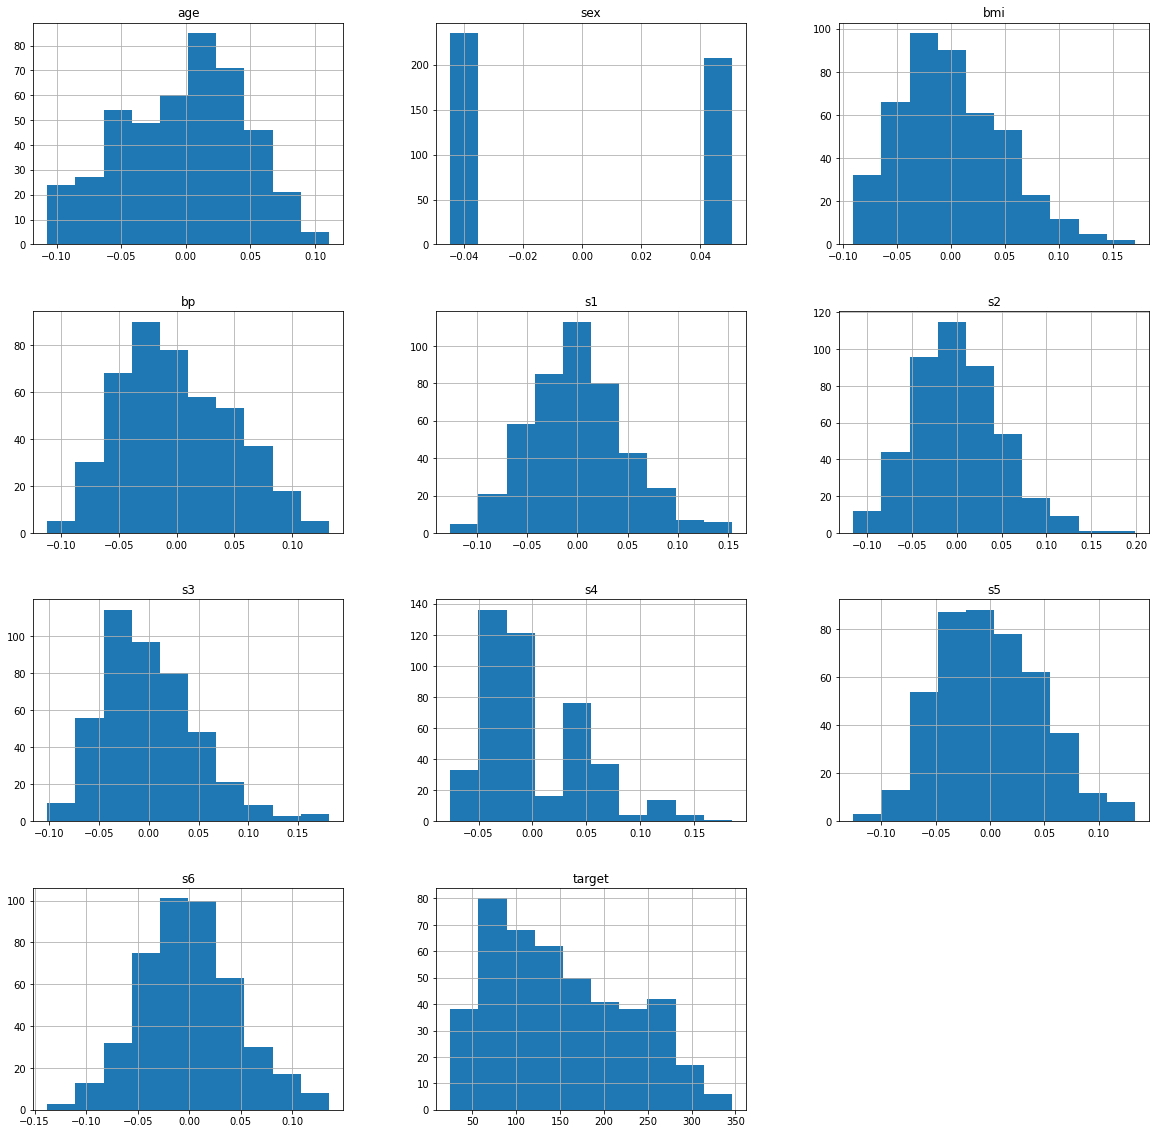

In [13]:
diabetes_data.hist(bins=10 , figsize=(20, 20))

# Train - Test Spliting 

In [14]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(diabetes_data , test_size=0.2 , random_state=42)
print(f"Rows in train set : {len(train_set)} \n Rows in test set : {len(test_set)}")

Rows in train set : 353 
 Rows in test set : 89


In [15]:
train_set

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,144.0
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633,150.0
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,280.0
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483,125.0
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0
...,...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920,134.0
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491,202.0
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078,148.0
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,64.0


# Correlation

In [16]:
corr_metrix = diabetes_data.corr()
corr_metrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

array([[<AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='target', ylabel='bmi'>,
        <AxesSubplot:xlabel='s5', ylabel='bmi'>,
        <AxesSubplot:xlabel='s3', ylabel='bmi'>],
       [<AxesSubplot:xlabel='bmi', ylabel='target'>,
        <AxesSubplot:xlabel='target', ylabel='target'>,
        <AxesSubplot:xlabel='s5', ylabel='target'>,
        <AxesSubplot:xlabel='s3', ylabel='target'>],
       [<AxesSubplot:xlabel='bmi', ylabel='s5'>,
        <AxesSubplot:xlabel='target', ylabel='s5'>,
        <AxesSubplot:xlabel='s5', ylabel='s5'>,
        <AxesSubplot:xlabel='s3', ylabel='s5'>],
       [<AxesSubplot:xlabel='bmi', ylabel='s3'>,
        <AxesSubplot:xlabel='target', ylabel='s3'>,
        <AxesSubplot:xlabel='s5', ylabel='s3'>,
        <AxesSubplot:xlabel='s3', ylabel='s3'>]], dtype=object)

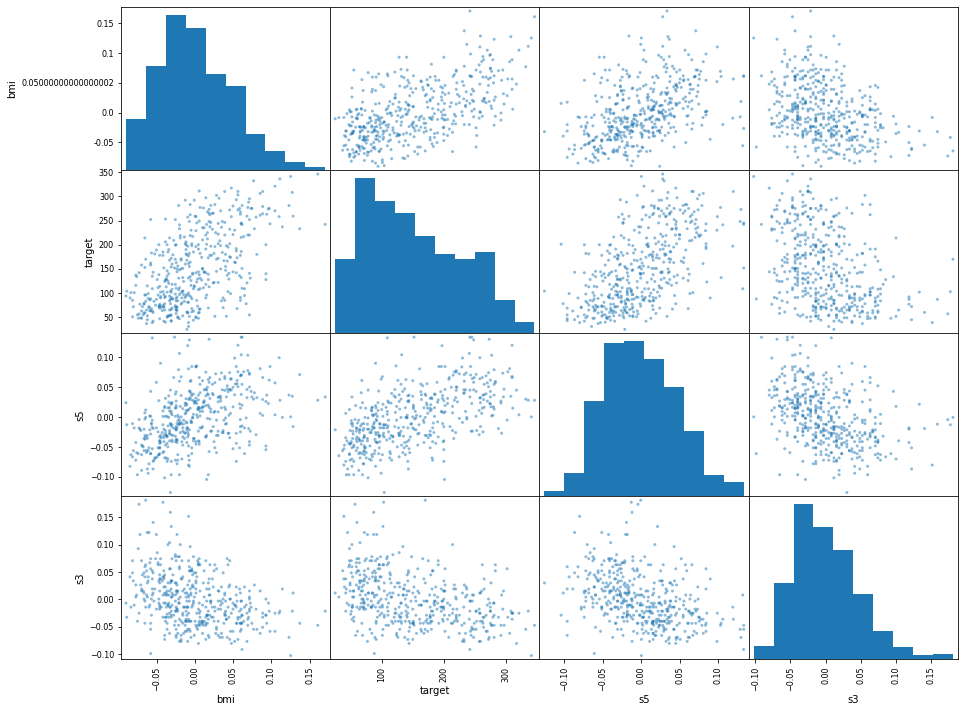

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["bmi" , "target" , "s5" ,"s3"]
scatter_matrix(diabetes_data[attributes] ,figsize=(15,12))

<AxesSubplot:xlabel='bmi', ylabel='target'>

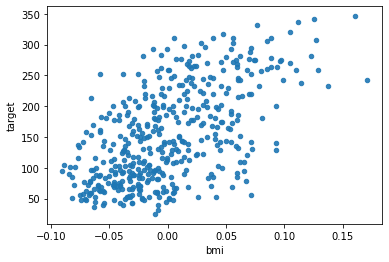

In [18]:
diabetes_data.plot(kind = "scatter" ,x = "bmi", y = "target" , alpha = 0.9 )

In [19]:
diabetes_data_features = train_set.drop("target" , axis = 1)
diabetes_data_labels = train_set["target"].copy()

In [20]:
diabetes_data_features.shape

(353, 10)

In [21]:
diabetes_data_labels.shape

(353,)

# Creating model

In [22]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# model = DecisionTreeRegressor()
# model = LinearRegression()
model.fit(diabetes_data_features , diabetes_data_labels)


RandomForestRegressor()

In [23]:
some_features = diabetes_data_features[:5]
some_labels = diabetes_data_labels[:5]

In [24]:
model.predict(some_features)

array([155.32, 143.47, 253.86, 109.21,  61.11])

In [25]:
list(some_labels)

[144.0, 150.0, 280.0, 125.0, 59.0]

# Loss Function 

In [26]:
from sklearn.metrics import mean_squared_error
diabetes_predication = model.predict(some_features)
mse = mean_squared_error(some_labels , diabetes_predication)
rmse = np.sqrt(mse)

In [27]:
rmse

14.885288710670002

# Evaluvating Cross values 

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , diabetes_data_features , diabetes_data_labels , scoring="neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)

In [29]:
rmse_scores

array([48.50211745, 64.49797503, 54.86398092, 75.72804138, 61.95053206,
       49.63561486, 58.1397407 , 59.58926783, 52.22253827, 56.65583427])

In [30]:
def print_scores(scores):
    print("scores:", scores)
    print("mean :", scores.mean())
    print("standard deviation :", scores.std())

In [31]:
print_scores(rmse_scores)

scores: [48.50211745 64.49797503 54.86398092 75.72804138 61.95053206 49.63561486
 58.1397407  59.58926783 52.22253827 56.65583427]
mean : 58.178564277728796
standard deviation : 7.612709470808673
